#UBC Ovarian Cancer Subtype Classification and Outlier Detection (UBC-OCEAN)
**Navigating Ovarian Cancer: Unveiling Common Histotypes and Unearthing Rare Variants**

In [1]:
import pandas as pd
train=pd.read_csv('/kaggle/input/UBC-OCEAN/train.csv')
train.head()

,image_id,label,image_width,image_height,is_tma
0,4,HGSC,23785,20008,False
1,66,LGSC,48871,48195,False
2,91,HGSC,3388,3388,True
3,281,LGSC,42309,15545,False
4,286,EC,37204,30020,False


In [2]:
train.shape

(538, 5)

In [3]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 538 entries, 0 to 537
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   image_id      538 non-null    int64 
 1   label         538 non-null    object
 2   image_width   538 non-null    int64 
 3   image_height  538 non-null    int64 
 4   is_tma        538 non-null    bool  
dtypes: bool(1), int64(3), object(1)
memory usage: 17.5+ KB


In [4]:
train.dtypes

image_id         int64
label           object
image_width      int64
image_height     int64
is_tma            bool
dtype: object

In [5]:
train.describe()

,image_id,image_width,image_height
count,538.000000,538.000000,538.000000
mean,32194.340149,48859.533457,29729.460967
std,18774.950592,20040.989927,10762.899796
min,4.000000,2964.000000,2964.000000
25%,15881.250000,34509.000000,22089.500000
50%,32152.000000,48160.000000,29732.000000
75%,47892.500000,64143.750000,37880.750000
max,65533.000000,105763.000000,50155.000000


In [6]:
train.isnull().sum().sum()

0

In [7]:
train.drop('is_tma',axis=1,inplace=True)
train.head()

,image_id,label,image_width,image_height
0,4,HGSC,23785,20008
1,66,LGSC,48871,48195
2,91,HGSC,3388,3388
3,281,LGSC,42309,15545
4,286,EC,37204,30020


In [8]:
train['label'].value_counts(normalize=True) #label is the target variable

label
HGSC    0.412639
EC      0.230483
CC      0.184015
LGSC    0.087361
MC      0.085502
Name: proportion, dtype: float64

In [9]:
#CC (Clear Cell Carcinoma): Clear Cell Carcinoma is a type of ovarian cancer characterized by cells that appear clear under a microscope.
#EC (Endometrioid Carcinoma):Endometrioid Carcinoma is a type of ovarian cancer that resembles the tissue lining the uterus (endometrium).
#HGSC (High-Grade Serous Carcinoma): High-Grade Serous Carcinoma is an aggressive form of ovarian cancer that is typically diagnosed at an advanced stage.
#LGSC (Low-Grade Serous Carcinoma): Low-Grade Serous Carcinoma is a less aggressive form of ovarian cancer, often diagnosed at an earlier stage.
#MC (Mucinous Carcinoma): Mucinous Carcinoma is a type of ovarian cancer that arises from cells that produce mucus.

([<matplotlib.patches.Wedge at 0x7fdea7eb67d0>,
 [Text(0.2981207899754956, 1.0588314287857092, 'CC'),
  Text(-1.0831643577013341, -0.19171586842370836, 'EC'),
  Text(-0.10262375040094325, -1.0952024314498416, 'MC'),
  Text(0.7571124488572663, -0.7979854257975852, 'LGSC'),
  Text(1.0605542357588946, -0.29193272001244946, 'HGSC')])

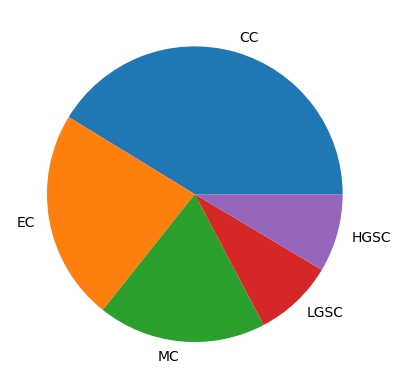

In [10]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.pie(x=train['label'].value_counts(),labels={'HGSC','EC','CC','LGSC','MC'})

In [11]:
sample_submission_url='/kaggle/input/UBC-OCEAN/sample_submission.csv'
sample_submission_df=pd.read_csv(sample_submission_url)
sample_submission_df
sample_submission_df.shape

(1, 2)

In [12]:
train.shape

(538, 4)

In [13]:
traget='label'


Text(0.5, 1.0, 'Distribution of Test')

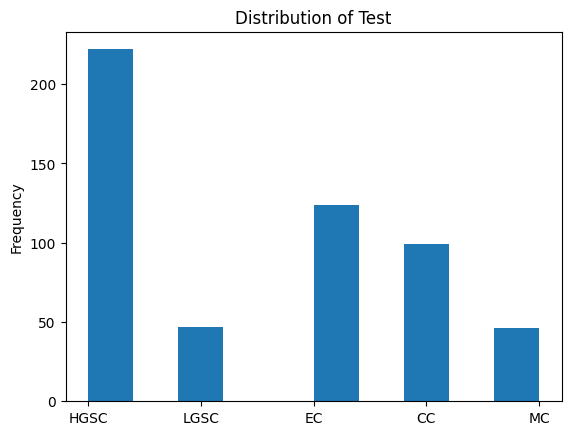

In [14]:
import matplotlib.pyplot as plt

plt.hist(train['label'])

plt.ylabel('Frequency')
plt.title(r'Distribution of Test')

Text(0.5, 1.0, 'Box Plot of All Columns')

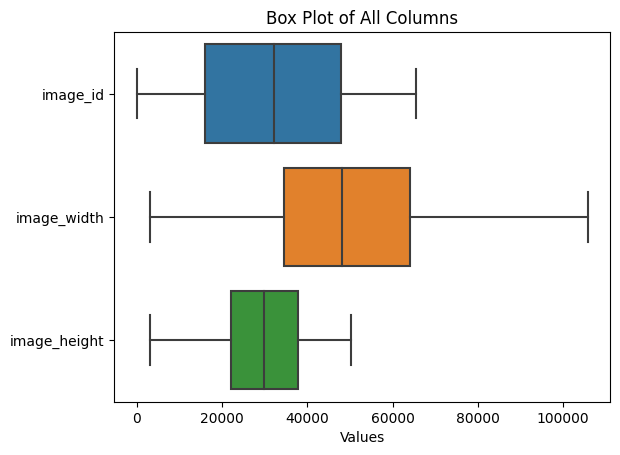

In [15]:
import seaborn  as sns
import matplotlib.pyplot as plt
outlin=['image_id', 'label', 'image_width','image_height']

sns.boxplot(data=train[outlin], orient='h')  # 'orient' is set to 'h' for horizontal box plots

plt.xlabel('Values')
plt.title('Box Plot of All Columns')

In [16]:
#split X,y
X=train.drop('label',axis=1)
y=train['label']

In [17]:
X.shape,y.shape

((538, 3), (538,))

In [18]:
X.head()

,image_id,image_width,image_height
0,4,23785,20008
1,66,48871,48195
2,91,3388,3388
3,281,42309,15545
4,286,37204,30020


In [19]:
y.head()

0    HGSC
1    LGSC
2    HGSC
3    LGSC
4      EC
Name: label, dtype: object

In [20]:
from sklearn.model_selection import train_test_split
X_train, X_val, y_train, y_val = train_test_split(
    X, y, test_size=0.2, random_state=1)

In [21]:
X_train.shape,y_train.shape,X_val.shape,y_val.shape

((430, 3), (430,), (108, 3), (108,))

In [22]:
X_train.head()

,image_id,image_width,image_height
85,9341,69320,36671
515,62641,16662,32055
146,17365,43902,26689
522,63367,62905,24783
223,27747,47487,28122


In [23]:
X_val.head()

,image_id,image_width,image_height
159,18813,54671,32443
397,46815,40640,45411
323,38669,41105,27185
400,47105,39020,39353
237,29147,38610,26181


In [24]:
#test data
test=pd.read_csv('/kaggle/input/UBC-OCEAN/test.csv')
test.head()

,image_id,image_width,image_height
0,41,28469,16987


In [25]:
test.shape

(1, 3)

In [26]:
test.shape

(1, 3)

In [27]:
X_test=test

In [28]:
X_test.shape

(1, 3)

In [29]:
X_test.head()

,image_id,image_width,image_height
0,41,28469,16987


In [30]:
#y_pred='functional'
#y_pred
from sklearn.metrics import accuracy_score
import numpy as np
#y_pred = pd.DataFrame(np.zeros((len(X_test)),dtype=int))
#y_pred
#y_pred=[0,0,0,0]
#y_true=[0,1,2,0]
#accuracy_score(y_true,y_pred)
submission= X_train['image_id']

#submission.to_csv('submission.csv',index=False)
submission

85      9341
515    62641
146    17365
522    63367
223    27747
       ...  
129    15470
144    17174
72      8130
235    28922
37      4134
Name: image_id, Length: 430, dtype: int64

In [31]:
baseline_acc = 0.82
print('Baseline Accuracy Score:', baseline_acc)

Baseline Accuracy Score: 0.82


In [32]:
#Building our first model (DecisionTreeClassifier)

import category_encoders as ce
from sklearn.pipeline import make_pipeline
from sklearn.tree import DecisionTreeClassifier

pipeline=make_pipeline(
   #ce.OrdinalEncoder(),
   DecisionTreeClassifier(max_depth=3,max_features=100,random_state=41)
)
pipeline.fit(X_train,y_train)
print("train Validation Accuracy",pipeline.score(X_train,y_train))

train Validation Accuracy 0.47674418604651164


In [33]:
y_pred=pipeline.predict(X_test)
y_pred

array(['HGSC'], dtype=object)

In [34]:
#print("test Accuracy",pipeline.score(X_test,y_test))
print("val Accuracy",pipeline.score(X_val,y_val))

val Accuracy 0.32407407407407407


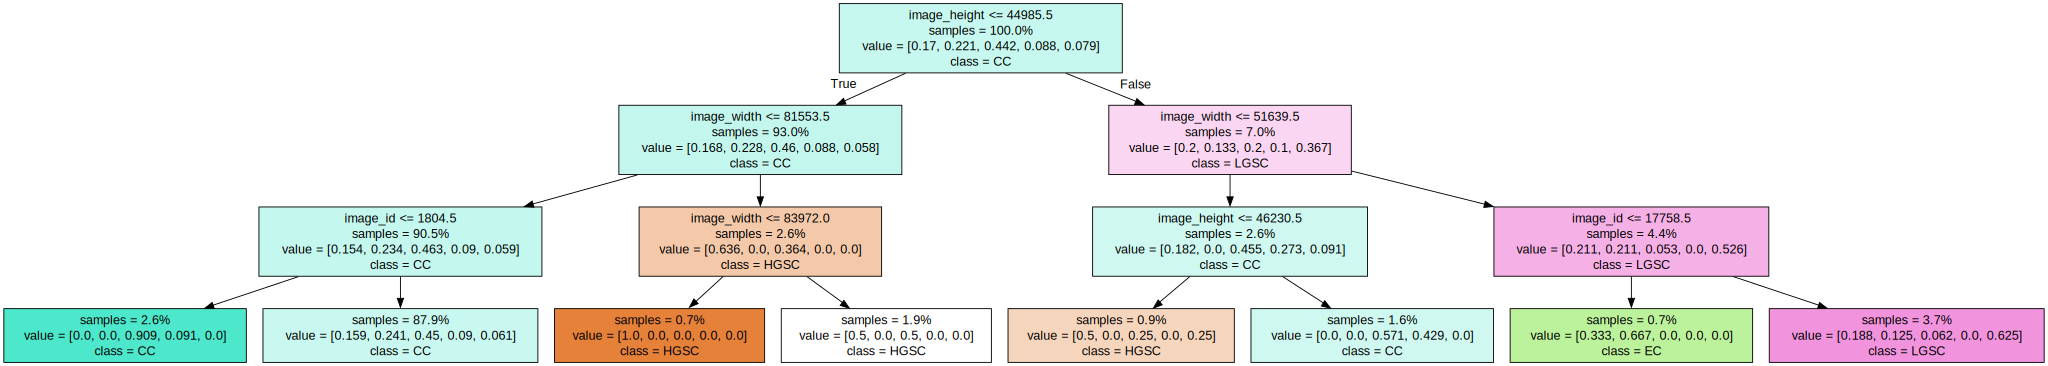

In [35]:
#This score is too good to be true.
# Visualize the decision tree, to see what the model 'learned'

import graphviz
from sklearn.tree import export_graphviz
tree = pipeline.named_steps['decisiontreeclassifier']
dot_data= export_graphviz(
    tree,
    out_file=None,
    feature_names = X_train.columns,
    class_names = y_train.unique().astype(str),
    filled = True,
    impurity= False,
    proportion = True

)
graphviz.Source(dot_data)

In [36]:
'''T6. Build a pipeline `model` with encoder and tree-based predictor.'''

# YOUR CODE HERE
#raise NotImplementedError()

from sklearn.preprocessing import OrdinalEncoder
import category_encoders as ce
from sklearn.impute import SimpleImputer
from sklearn.pipeline import make_pipeline
from sklearn.ensemble import RandomForestClassifier #RandomForest
model= make_pipeline(
    #ce.OrdinalEncoder(),
    SimpleImputer(strategy='mean'),
    RandomForestClassifier(n_estimators=3,random_state=41,max_features=2)
)
model.fit(X_train,y_train);
print("trainValidation Accuracy",model.score(X_train,y_train))

trainValidation Accuracy 0.8674418604651163


In [37]:
print("Validation Accuracy", model.score(X_val,y_val))

Validation Accuracy 0.24074074074074073


In [38]:
y_train_pred=model.predict(X_train)
y_val_pred=model.predict(X_val)
y_test_pred=model.predict(X_test)

In [39]:
y_train_pred

array(['HGSC', 'HGSC', 'HGSC', 'EC', 'HGSC', 'HGSC', 'EC', 'HGSC', 'CC',
       'EC', 'CC', 'HGSC', 'CC', 'MC', 'LGSC', 'HGSC', 'LGSC', 'HGSC',
       'HGSC', 'CC', 'LGSC', 'HGSC', 'CC', 'CC', 'EC', 'EC', 'HGSC',
       'HGSC', 'LGSC', 'EC', 'CC', 'HGSC', 'CC', 'EC', 'CC', 'LGSC', 'CC',
       'MC', 'CC', 'CC', 'CC', 'CC', 'LGSC', 'HGSC', 'EC', 'CC', 'HGSC',
       'CC', 'LGSC', 'HGSC', 'LGSC', 'EC', 'EC', 'HGSC', 'HGSC', 'EC',
       'HGSC', 'EC', 'HGSC', 'CC', 'EC', 'CC', 'CC', 'CC', 'HGSC', 'MC',
       'HGSC', 'EC', 'HGSC', 'EC', 'HGSC', 'EC', 'HGSC', 'EC', 'HGSC',
       'HGSC', 'HGSC', 'HGSC', 'LGSC', 'CC', 'CC', 'EC', 'EC', 'HGSC',
       'CC', 'CC', 'HGSC', 'HGSC', 'HGSC', 'EC', 'CC', 'HGSC', 'CC',
       'LGSC', 'EC', 'HGSC', 'MC', 'EC', 'CC', 'HGSC', 'HGSC', 'MC',
       'HGSC', 'MC', 'HGSC', 'HGSC', 'EC', 'EC', 'HGSC', 'EC', 'EC',
       'HGSC', 'HGSC', 'MC', 'HGSC', 'CC', 'HGSC', 'MC', 'EC', 'MC',
       'HGSC', 'MC', 'HGSC', 'HGSC', 'EC', 'HGSC', 'CC', 'EC', 'EC',
       '

In [40]:
y_test_pred

array(['HGSC'], dtype=object)

In [41]:
from sklearn.metrics import accuracy_score

train_acc =  accuracy_score(y_train_pred,y_train)
#test_acc =  accuracy_score(y_test_pred,X_test)
val_acc= accuracy_score(y_val_pred,y_val)
print('Training Accuracy Score:', train_acc)
#print('Testing Accuracy Score:', test_acc)
print('val Accuracy Score:', val_acc)

Training Accuracy Score: 0.8674418604651163
val Accuracy Score: 0.24074074074074073


In [42]:
from  xgboost import XGBClassifier
from sklearn.preprocessing import LabelEncoder

model11 = XGBClassifier(max_depth=3,n_estimators=100,random_state=42,n_jobs=100)
# Initialize LabelEncoder
label_encoder = LabelEncoder()

# Fit and transform the target variable in the training set
y_train_encoded = label_encoder.fit_transform(y_train)

# Now, you can fit the model using the encoded target variable
model11.fit(X_train, y_train_encoded)

# Print the model and its accuracy
print()
print(model11)
print("train accuracy:", model11.score(X_train, y_train_encoded))


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=3, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=100, num_parallel_tree=None,
              objective='multi:softprob', predictor=None, ...)
train accuracy: 0.9697674418604652


In [43]:
# Initialize LabelEncoder
label_encoder = LabelEncoder()

# Fit and transform the target variable in the training set
y_val_encoded = label_encoder.fit_transform(y_val)

scoreval = model11.score(X_val,y_val_encoded)

print(scoreval)


0.37962962962962965


In [44]:
# Print classification report
from sklearn.metrics import classification_report
print(classification_report(y_train,model.predict(X_train)))

              precision    recall  f1-score   support

          CC       0.78      0.86      0.82        73
          EC       0.83      0.87      0.85        95
        HGSC       0.91      0.88      0.90       190
        LGSC       0.89      0.82      0.85        38
          MC       0.93      0.82      0.87        34

    accuracy                           0.87       430
   macro avg       0.87      0.85      0.86       430
weighted avg       0.87      0.87      0.87       430



In [45]:
from sklearn.metrics import confusion_matrix, classification_report
import random

# Generate some sample true and predicted labels for demonstration purposes
y_true = np.random.randint(0, 3, size=100)
y_pred = np.random.randint(0, 3, size=100)

# 1. Confusion Matrix
conf_matrix = confusion_matrix(y_true, y_pred)
print("Confusion Matrix:")
print(conf_matrix)

# 2. Classification Report
class_report = classification_report(y_true, y_pred)
print("\nClassification Report:")
print(class_report)

Confusion Matrix:
[[10  9  9]
 [16 11 10]
 [12 13 10]]

Classification Report:
              precision    recall  f1-score   support

           0       0.26      0.36      0.30        28
           1       0.33      0.30      0.31        37
           2       0.34      0.29      0.31        35

    accuracy                           0.31       100
   macro avg       0.31      0.31      0.31       100
weighted avg       0.32      0.31      0.31       100



In [46]:

#y_pred1 = pd.DataFrame(y_pred)
#y_pred1=y_pred1.replace({'CC ':2,'EC':5,'HGSC':6,'LGSC':4,'MC':3})
#y_pred1.head()

In [47]:
#image_id,label
#2,CC
#5,EC
#6,HGSC
#etc.

In [48]:
# Create a submission file
#submission = pd.DataFrame({'image_id':X_train['image_id'], 'label': y_train_pred})
#submission
#submission.to_csv('submission.csv', index=False)

In [49]:
import pandas as pd

# Sample data
#data = [[
    #'image_id': [2, 5, 6,4,3],
    #'label': ['CC', 'EC', 'HGSC','LGSC','MC']
#]]
#data=sample_submission_df[['image_id','label']]
#df=pd.DataFrame(data)

# Creating a DataFrame
#df = pd.DataFrame(data)
#df=y_pred1
#submission['label']
#submission
#submission.to_csv('submission.csv',index=False)


In [50]:
y_pred1= model.predict(X_train)
y_pred1

array(['HGSC', 'HGSC', 'HGSC', 'EC', 'HGSC', 'HGSC', 'EC', 'HGSC', 'CC',
       'EC', 'CC', 'HGSC', 'CC', 'MC', 'LGSC', 'HGSC', 'LGSC', 'HGSC',
       'HGSC', 'CC', 'LGSC', 'HGSC', 'CC', 'CC', 'EC', 'EC', 'HGSC',
       'HGSC', 'LGSC', 'EC', 'CC', 'HGSC', 'CC', 'EC', 'CC', 'LGSC', 'CC',
       'MC', 'CC', 'CC', 'CC', 'CC', 'LGSC', 'HGSC', 'EC', 'CC', 'HGSC',
       'CC', 'LGSC', 'HGSC', 'LGSC', 'EC', 'EC', 'HGSC', 'HGSC', 'EC',
       'HGSC', 'EC', 'HGSC', 'CC', 'EC', 'CC', 'CC', 'CC', 'HGSC', 'MC',
       'HGSC', 'EC', 'HGSC', 'EC', 'HGSC', 'EC', 'HGSC', 'EC', 'HGSC',
       'HGSC', 'HGSC', 'HGSC', 'LGSC', 'CC', 'CC', 'EC', 'EC', 'HGSC',
       'CC', 'CC', 'HGSC', 'HGSC', 'HGSC', 'EC', 'CC', 'HGSC', 'CC',
       'LGSC', 'EC', 'HGSC', 'MC', 'EC', 'CC', 'HGSC', 'HGSC', 'MC',
       'HGSC', 'MC', 'HGSC', 'HGSC', 'EC', 'EC', 'HGSC', 'EC', 'EC',
       'HGSC', 'HGSC', 'MC', 'HGSC', 'CC', 'HGSC', 'MC', 'EC', 'MC',
       'HGSC', 'MC', 'HGSC', 'HGSC', 'EC', 'HGSC', 'CC', 'EC', 'EC',
       '

In [51]:

#submission= sample_submission_df[['image_id']].copy()

submission['label'] = y_pred1
submission
submission.to_csv('baseline_accuracy.csv',index=False)
